In [1]:
# globa library
from pandas import read_csv, DataFrame, to_datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


#3 links de ínteres

In [2]:
# Dataframe

df_datagen = read_csv(r'd:\mis documentos\Cigre\cigrec2.5_spp_analytics-main\cigrec2.5_spp_analytics-main\DataGeneración_filo.csv')
df_semestre2 = df_datagen.loc[(df_datagen['Fecha'] >= '2021-07-01') & (df_datagen['Fecha'] < '2021-12-31')]


In [3]:
df_semestre2.index = to_datetime(df_semestre2['Fecha'])
del df_semestre2['Fecha']



In [5]:
print(df_semestre2.head())


                           kWh
Fecha                         
2021-07-01 00:00:00  287172.02
2021-07-01 01:00:00  177438.42
2021-07-01 02:00:00  153127.16
2021-07-01 03:00:00  156141.02
2021-07-01 04:00:00  155618.57


<AxesSubplot:xlabel='Fecha'>

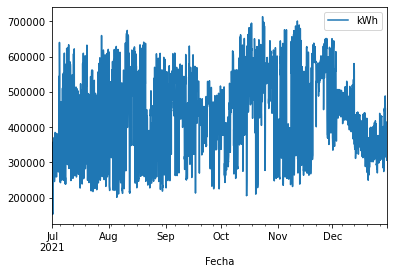

In [6]:
df_semestre2.plot()


In [8]:
df_semestre2_day = df_semestre2.resample("d").mean()


<AxesSubplot:xlabel='Fecha'>

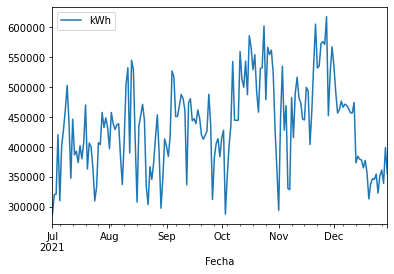

In [9]:
df_semestre2_day.plot()


# Stationarity

In [10]:
# semestre 2
rolling_mean_6t = df_semestre2_day.rolling(7).mean()
rolling_std_6t = df_semestre2_day.rolling(7).std()

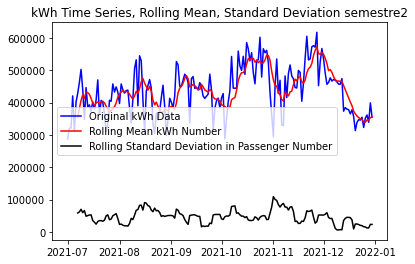

In [11]:
plt.plot(df_semestre2_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean_6t, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std_6t, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation semestre2")
plt.legend(loc="best")

In [12]:
adft_6 = adfuller(df_semestre2_day,autolag="AIC")


In [13]:
output_df_6 = DataFrame(
        {"Values":[
            adft_6[0],adft_6[1],adft_6[2],adft_6[3], adft_6[4]['1%'], adft_6[4]['5%'], adft_6[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

In [14]:
display(output_df_6)


,Values,Metric
0,-2.993380,Test Statistics
1,0.035517,p-value
2,4.000000,No. of lags used
3,178.000000,Number of observations used
4,-3.467632,critical value (1%)
5,-2.877918,critical value (5%)
6,-2.575501,critical value (10%)


# Autocorrelation

In [15]:
autocorrelation_lag1_6 = df_semestre2_day['kWh'].autocorr(lag=1)
print("One Day Lag 6T: ", autocorrelation_lag1_6)


One Day Lag 6T:  0.6593130524540375


In [16]:
day=6
autocorrelation_lag9_6 = df_semestre2_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag 6T: ", autocorrelation_lag9_6)


6 Day Lag 6T:  0.3736516924494291


# Decomposition

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose